# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sony\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Load the Unsupervised data

In [2]:
dataset = pd.read_csv('C:/Users/Sony/Desktop/Data-Science-Training/6. Clustering/Mall_Customers.csv')

In [3]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# For simplicity purpose, I am taking last 2 columns
data_cluster = dataset.iloc[ : ,3:5].values

In [6]:
data_cluster

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Find the Optimal Clusters

In [25]:
from sklearn.cluster import KMeans

In [27]:
# Found WCSS for 1-10 cluster
wcss = []
for i in range(1,11):
    kmeanOptimal = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeanOptimal.fit(data_cluster)
    wcss.append(kmeanOptimal.inertia_)


In [28]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

# Create the Elbow Method

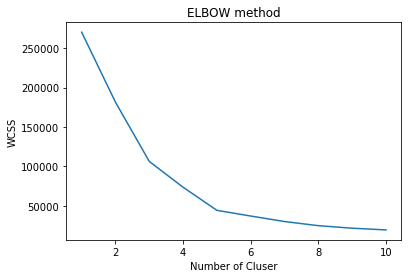

In [29]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Cluser')
plt.ylabel('WCSS')
plt.title('ELBOW method')
plt.show()

In [30]:
# find the WCSS for 11-20 clusters
for i in range(11,21):
    kmeanOptimal = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeanOptimal.fit(data_cluster)
    wcss.append(kmeanOptimal.inertia_)

In [31]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543,
 17602.19046838677,
 16115.215606639838,
 14600.44364738564,
 13450.08023381847,
 12038.745689262341,
 11116.622080860318,
 10229.456024531024,
 9517.592890442891,
 9038.027227603314,
 8144.752868628955]

In [32]:
len(wcss)

20

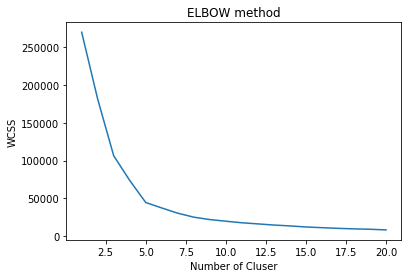

In [33]:
plt.plot(range(1,21), wcss)
plt.xlabel('Number of Cluser')
plt.ylabel('WCSS')
plt.title('ELBOW method')
plt.show()

By looking at the Elbow Method, 5 is the optimal cluster

# apply the K-Mean Clustering Algorithm

Ideal Scenario: 
    1. Find the Optimal Cluster
    2. Apply kmean alogorithm on the Optimal Cluster and predict the output


In [7]:
from sklearn.cluster import KMeans

In [35]:
kmeanObject = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [36]:
# Fit out data into kmeanObject
kmeanObject.fit(data_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [38]:
# Create the clusters
cluster5 = kmeanObject.predict(data_cluster)

In [39]:
cluster5

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

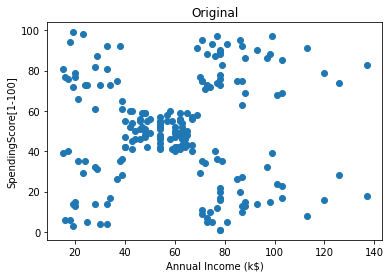

In [41]:
plt.scatter(data_cluster[:,0], data_cluster[:,1])
plt.title('Original')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore[1-100]')
plt.show()

# Let's visualize the cluster

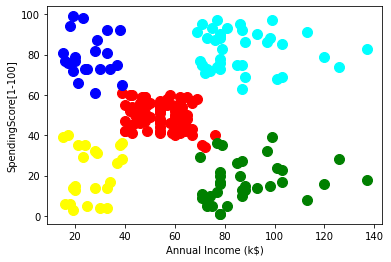

In [43]:
plt.scatter(data_cluster[cluster8 == 0, 0], data_cluster[cluster8 == 0, 1], s = 100, c = 'red', label='cluster 1')
plt.scatter(data_cluster[cluster8 == 1, 0], data_cluster[cluster8 == 1, 1], s = 100, c = 'blue', label='cluster 2')
plt.scatter(data_cluster[cluster8 == 2, 0], data_cluster[cluster8 == 2, 1], s = 100, c = 'cyan', label='cluster 3')
plt.scatter(data_cluster[cluster8 == 3, 0], data_cluster[cluster8 == 3, 1], s = 100, c = 'yellow', label='cluster 4')
plt.scatter(data_cluster[cluster8 == 4, 0], data_cluster[cluster8 == 4, 1], s = 100, c = 'green', label='cluster 5')
#plt.scatter(data_cluster[cluster8 == 5, 0], data_cluster[cluster8 == 5, 1], s = 100, c = 'black', label='cluster 6')
#plt.scatter(data_cluster[cluster8 == 6, 0], data_cluster[cluster8 == 6, 1], s = 100, c = 'magenta', label='cluster 7')
#plt.scatter(data_cluster[cluster8 == 7, 0], data_cluster[cluster8 == 7, 1], s = 100, c = 'green', label='cluster 8')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore[1-100]')
#plt.legend()
plt.show()

In [44]:
kmeanObject.inertia_ # Within Cluster Sum of Square : WCSS

44448.45544793371

# How we store the output


In [45]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [46]:
dataset['Cluster'] = cluster5

In [47]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        1  
2        3  
3        1  
4        3

In [52]:
dataset[dataset['Cluster'] == 3]

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0            1    Male   19                  15                      39   
2            3  Female   20                  16                       6   
4            5  Female   31                  17                      40   
6            7  Female   35                  18                       6   
8            9    Male   64                  19                       3   
10          11    Male   67                  19                      14   
12          13  Female   58                  20                      15   
14          15    Male   37                  20                      13   
16          17  Female   35                  21                      35   
18          19    Male   52                  23                      29   
20          21    Male   35                  24                      35   
22          23  Female   46                  25                       5   
24          25  Female   54                  28                      14   
26          27  Female   45                  28                      32   
28          29  Female   40                  29                      31   
30          31    Male   60                  30                       4   
32          33    Male   53                  33                       4   
34          35  Female   49                  33                      14   
36          37  Female   42                  34                      17   
38          39  Female   36                  37                      26   
40          41  Female   65                  38                      35   
42          43    Male   48                  39                      36   
44          45  Female   49                  39                      28   

    Cluster  
0         3  
2         3  
4         3  
6         3  
8         3  
10        3  
12        3  
14        3  
16        3  
18        3  
20        3  
22        3  
24        3  
26        3  
28        3  
30        3  
32        3  
34        3  
36        3  
38        3  
40        3  
42        3  
44        3

In [ ]:
# PCA - 10 column : 2 column

In [53]:
a = dataset[dataset['Cluster'] == 3]

In [54]:
a.describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    23.00000  23.000000           23.000000               23.000000   
mean     23.00000  45.217391           26.304348               20.913043   
std      13.56466  13.228607            7.893811               13.017167   
min       1.00000  19.000000           15.000000                3.000000   
25%      12.00000  35.500000           19.500000                9.500000   
50%      23.00000  46.000000           25.000000               17.000000   
75%      34.00000  53.500000           33.000000               33.500000   
max      45.00000  67.000000           39.000000               40.000000   

       Cluster  
count     23.0  
mean       3.0  
std        0.0  
min        3.0  
25%        3.0  
50%        3.0  
75%        3.0  
max        3.0